

# COGS 108 - Data Checkpoint
## Names
* Ling Jin
* Teng Wong
* Zhiyuan Chen
* Meishi Li 
* Yifan Lu


## Research Question: 
### What factor(s) play the most important role in determining the popularity of a song on Spotify?



# Setup

In [1]:
import os
import pandas as pd
import numpy as np
import datetime

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

import seaborn as sns
sns.set(style="white", font_scale=2)
import patsy
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import ttest_ind



### Before the cleaning steps, we did the following things:
 1) First, we sort the values by their popularity in the decending order so we see the most popular song at 
     the beginning.
 2) We dropped the items which have 0 popularity.
 3) In order to narrow down the data size, we dropped the songs prior to year of 1982.
 4) We then checked for null values and drop all null values.
 5) We finally reset their id so that it starts on 0 again instead of their original id.


### Below are the explaination of the column elements in our data file:


#### Primary:
- id (Id of track generated by Spotify)
#### Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)
#### Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)
#### Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- artists (List of artists mentioned)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)


According to the creator of the dataset, the "data.csv" file contains more than 175.000 songs collected from Spotify Web API. 

The creator is a self-taught data scientist and music enthusiats, who always wanted to do some scientific research using Spotify Web API. He/she found out there was a "knowledge gap" in this field that there is no up-to-date and large-scale dataset, and that became the reason to create this dataset.

## Data Cleaning

In [2]:
df = pd.read_csv('data.csv')

df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


### Column rearrange

In [3]:
col_names = list(df.columns)
print(col_names)

df=df[["popularity","artists", "acousticness","duration_ms","year", "explicit","danceability",
       "energy","instrumentalness","key","liveness","loudness","mode","speechiness",
       "tempo","valence"]]

df

['acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo', 'valence', 'year']


,popularity,artists,acousticness,duration_ms,year,explicit,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,12,['Mamie Smith'],0.991000,168333,1920,0,0.598,0.224,0.000522,5,0.3790,-12.628,0,0.0936,149.976,0.6340
1,7,"[""Screamin' Jay Hawkins""]",0.643000,150200,1920,0,0.852,0.517,0.026400,5,0.0809,-7.261,0,0.0534,86.889,0.9500
2,4,['Mamie Smith'],0.993000,163827,1920,0,0.647,0.186,0.000018,0,0.5190,-12.098,1,0.1740,97.600,0.6890
3,17,['Oscar Velazquez'],0.000173,422087,1920,0,0.730,0.798,0.801000,2,0.1280,-7.311,1,0.0425,127.997,0.0422
4,2,['Mixe'],0.295000,165224,1920,1,0.704,0.707,0.000246,10,0.4020,-6.036,0,0.0768,122.076,0.2990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0,"['DJ Combo', 'Sander-7', 'Tony T']",0.009170,147615,2020,0,0.792,0.866,0.000060,6,0.1780,-5.089,0,0.0356,125.972,0.1860
174385,0,['Alessia Cara'],0.795000,144720,2021,0,0.429,0.211,0.000000,4,0.1960,-11.665,1,0.0360,94.710,0.2280
174386,0,['Roger Fly'],0.806000,218147,2020,0,0.671,0.589,0.920000,4,0.1130,-12.393,0,0.0282,108.058,0.7140
174387,69,['Taylor Swift'],0.920000,244000,2021,1,0.462,0.240,0.000000,0,0.1130,-12.077,1,0.0377,171.319,0.3200


### Sort by Popularity

In [4]:
df = df.sort_values(by = ['popularity'], ascending = False)
df

,popularity,artists,acousticness,duration_ms,year,explicit,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
20062,100,['Olivia Rodrigo'],0.721,242014,2021,1,0.585,0.436,0.000013,10,0.1050,-8.761,1,0.0601,143.874,0.132
19862,96,"['24kGoldn', 'iann dior']",0.221,140526,2020,1,0.700,0.722,0.000000,7,0.2720,-3.558,0,0.0369,90.989,0.756
19866,96,['Ariana Grande'],0.468,172325,2020,1,0.737,0.802,0.000000,0,0.0931,-4.771,1,0.0878,144.015,0.682
19886,95,"['Bad Bunny', 'Jhay Cortez']",0.401,205090,2020,1,0.731,0.573,0.000052,4,0.1130,-10.059,0,0.0544,109.928,0.145
19976,95,['KAROL G'],0.212,178947,2020,1,0.863,0.666,0.000493,1,0.1030,-4.158,0,0.1520,163.908,0.838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63064,0,['Tarun Banerjee'],0.982,199227,1952,0,0.530,0.204,0.004510,11,0.1430,-15.468,0,0.1080,79.712,0.320
63063,0,['Georges Derveaux'],0.994,162623,1952,0,0.209,0.245,0.916000,2,0.1280,-15.440,1,0.0415,139.475,0.148
63062,0,['Эрнест Хемингуэй'],0.154,95700,1952,1,0.800,0.328,0.000000,6,0.2670,-17.704,1,0.9250,42.490,0.344
63061,0,"['Hector Berlioz', 'Concertgebouworkest', 'Edu...",0.958,370787,1952,0,0.276,0.172,0.633000,9,0.0651,-16.904,1,0.0441,89.437,0.164


### Narrow down

In [5]:
df = df[df.popularity > 10]

df = df[df.year > 2000]

df.isnull().values.any()

df

,popularity,artists,acousticness,duration_ms,year,explicit,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
20062,100,['Olivia Rodrigo'],0.721,242014,2021,1,0.585,0.436,0.000013,10,0.1050,-8.761,1,0.0601,143.874,0.132
19862,96,"['24kGoldn', 'iann dior']",0.221,140526,2020,1,0.700,0.722,0.000000,7,0.2720,-3.558,0,0.0369,90.989,0.756
19866,96,['Ariana Grande'],0.468,172325,2020,1,0.737,0.802,0.000000,0,0.0931,-4.771,1,0.0878,144.015,0.682
19886,95,"['Bad Bunny', 'Jhay Cortez']",0.401,205090,2020,1,0.731,0.573,0.000052,4,0.1130,-10.059,0,0.0544,109.928,0.145
19976,95,['KAROL G'],0.212,178947,2020,1,0.863,0.666,0.000493,1,0.1030,-4.158,0,0.1520,163.908,0.838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90616,11,['Paul Carrack'],0.148,312422,2020,0,0.416,0.618,0.000101,7,0.3500,-8.620,1,0.0268,104.636,0.396
90097,11,['TvaylatBot'],0.198,46811,2020,0,0.497,0.691,0.935000,7,0.1030,-10.812,0,0.0639,159.997,0.411
90473,11,['Taxi'],0.343,264853,2003,0,0.618,0.713,0.000000,6,0.1070,-4.782,1,0.0257,147.977,0.546
123475,11,['Team'],0.352,244027,2016,0,0.660,0.638,0.000000,3,0.1760,-5.322,1,0.0295,147.929,0.531


In [6]:
df.reset_index(drop = True)

,popularity,artists,acousticness,duration_ms,year,explicit,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,100,['Olivia Rodrigo'],0.721,242014,2021,1,0.585,0.436,0.000013,10,0.1050,-8.761,1,0.0601,143.874,0.132
1,96,"['24kGoldn', 'iann dior']",0.221,140526,2020,1,0.700,0.722,0.000000,7,0.2720,-3.558,0,0.0369,90.989,0.756
2,96,['Ariana Grande'],0.468,172325,2020,1,0.737,0.802,0.000000,0,0.0931,-4.771,1,0.0878,144.015,0.682
3,95,"['Bad Bunny', 'Jhay Cortez']",0.401,205090,2020,1,0.731,0.573,0.000052,4,0.1130,-10.059,0,0.0544,109.928,0.145
4,95,['KAROL G'],0.212,178947,2020,1,0.863,0.666,0.000493,1,0.1030,-4.158,0,0.1520,163.908,0.838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24213,11,['Paul Carrack'],0.148,312422,2020,0,0.416,0.618,0.000101,7,0.3500,-8.620,1,0.0268,104.636,0.396
24214,11,['TvaylatBot'],0.198,46811,2020,0,0.497,0.691,0.935000,7,0.1030,-10.812,0,0.0639,159.997,0.411
24215,11,['Taxi'],0.343,264853,2003,0,0.618,0.713,0.000000,6,0.1070,-4.782,1,0.0257,147.977,0.546
24216,11,['Team'],0.352,244027,2016,0,0.660,0.638,0.000000,3,0.1760,-5.322,1,0.0295,147.929,0.531


# Some exploration before Analysis

In [7]:
mapping = {0: 'C', 1: 'C#/Db', 2: 'D', 3: 'D#/Eb', 4: 'E', 5: 'F', 6: 'F#/G',
          7: 'G', 8: 'G#/Ab', 9: 'A', 10: 'A#/Bb', 11: 'B'}
#Create a copy of the original one so the original one won't be changed and 
#we're still able to get the graph 
Newdf = df[df.popularity > 90]
#also the Newdf only contains songs that have popularity that is more than 90
Newdf = Newdf.applymap(lambda s: mapping.get(s) if s in mapping else s)
df

,popularity,artists,acousticness,duration_ms,year,explicit,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
20062,100,['Olivia Rodrigo'],0.721,242014,2021,1,0.585,0.436,0.000013,10,0.1050,-8.761,1,0.0601,143.874,0.132
19862,96,"['24kGoldn', 'iann dior']",0.221,140526,2020,1,0.700,0.722,0.000000,7,0.2720,-3.558,0,0.0369,90.989,0.756
19866,96,['Ariana Grande'],0.468,172325,2020,1,0.737,0.802,0.000000,0,0.0931,-4.771,1,0.0878,144.015,0.682
19886,95,"['Bad Bunny', 'Jhay Cortez']",0.401,205090,2020,1,0.731,0.573,0.000052,4,0.1130,-10.059,0,0.0544,109.928,0.145
19976,95,['KAROL G'],0.212,178947,2020,1,0.863,0.666,0.000493,1,0.1030,-4.158,0,0.1520,163.908,0.838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90616,11,['Paul Carrack'],0.148,312422,2020,0,0.416,0.618,0.000101,7,0.3500,-8.620,1,0.0268,104.636,0.396
90097,11,['TvaylatBot'],0.198,46811,2020,0,0.497,0.691,0.935000,7,0.1030,-10.812,0,0.0639,159.997,0.411
90473,11,['Taxi'],0.343,264853,2003,0,0.618,0.713,0.000000,6,0.1070,-4.782,1,0.0257,147.977,0.546
123475,11,['Team'],0.352,244027,2016,0,0.660,0.638,0.000000,3,0.1760,-5.322,1,0.0295,147.929,0.531


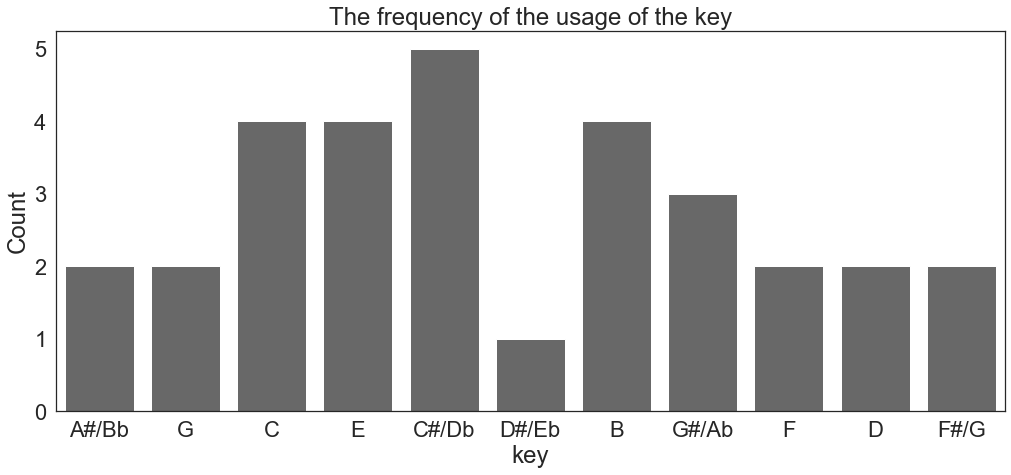

In [8]:
#graph
ax = sns.countplot(x='key', data=Newdf, color='#686868')
ax.set_title('The frequency of the usage of the key')
ax.set_ylabel('Count') 
ax.set_xlabel('key');


In this graph, we will be able to see what keys are used more frequently in popular songs than others(less popular songs). 
For example, key C#/Db, C, B, and E are used much more than D#/Eb. All keys are equal in the world of music, 
but in the world of modern music market, people prefer songs from certain keys more than others.

In [9]:
column_1 = df['key']
column_2 = df['popularity']
correlation = column_1.corr(column_2)
print(correlation)

-0.008317676985451158


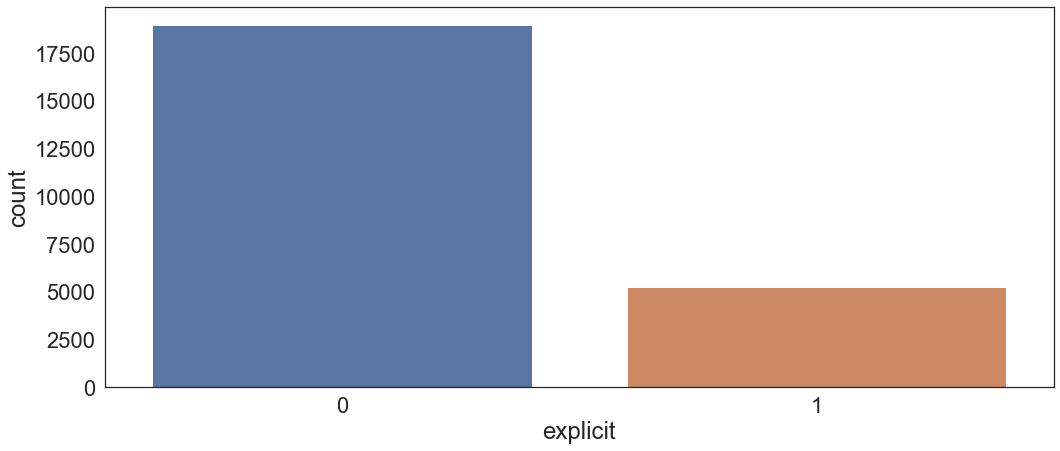

In [10]:
sns.countplot(x='explicit',data = df)

f2 = plt.gcf()
#the explicit values of the whole dataset (more songs that don't have strong lanaguges)

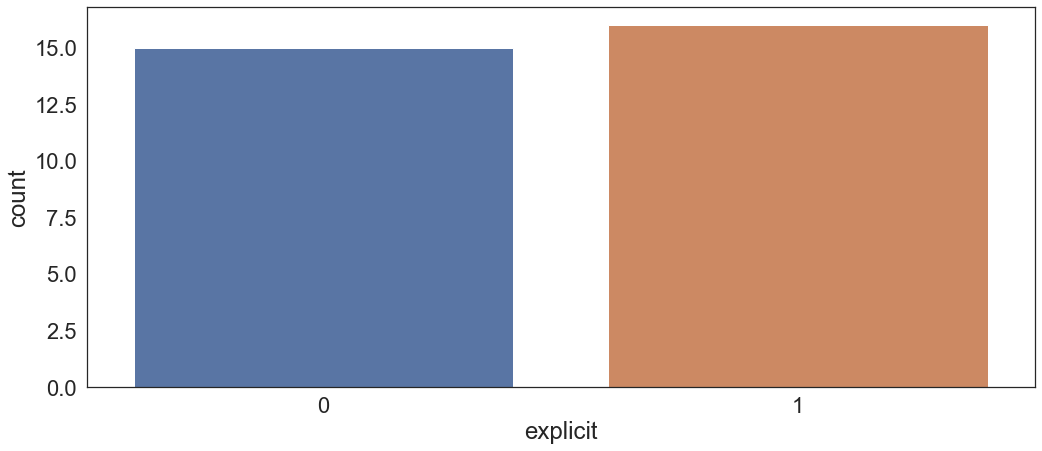

In [11]:
ExplicitDf = df[df.popularity > 90]
sns.countplot(x = 'explicit',data= ExplicitDf)

f2 = plt.gcf()


Comparing the explicit values of data sample of the whole dataset and the data from songs of popularity > 90,
we found out that popular songs tend to have much more 'strong lanaguges', aka more explicit in general.

In [12]:
#this cell contains only the songs that have more than one artist.
def artist_num(string):
    list = string.split(",")
    return len(list)

df=df.assign(artist_num = df["artists"].apply(artist_num))
multiple_artists_df = df[df["artist_num"]>1]
multiple_artists_df

,popularity,artists,acousticness,duration_ms,year,explicit,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist_num
19862,96,"['24kGoldn', 'iann dior']",0.221000,140526,2020,1,0.700,0.722,0.000000,7,0.2720,-3.558,0,0.0369,90.989,0.7560,2
19886,95,"['Bad Bunny', 'Jhay Cortez']",0.401000,205090,2020,1,0.731,0.573,0.000052,4,0.1130,-10.059,0,0.0544,109.928,0.1450,2
19928,94,"['Bad Bunny', 'ROSALÍA']",0.030300,203201,2020,0,0.856,0.618,0.000000,7,0.0866,-4.892,1,0.2860,81.993,0.3910,2
19880,92,"['Cardi B', 'Megan Thee Stallion']",0.019400,187541,2020,1,0.935,0.454,0.000000,1,0.0824,-7.509,1,0.3750,133.073,0.3570,2
19908,92,"['Justin Bieber', 'benny blanco']",0.864000,149297,2020,1,0.631,0.239,0.000000,11,0.1160,-7.071,0,0.0398,79.859,0.0927,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125018,11,"['รูกกี้ บีบี', 'รวมศิลปิน (เลิฟ ออฟ เดอะ เยีย...",0.671000,211976,2012,0,0.614,0.467,0.000000,7,0.1520,-5.862,1,0.0319,122.164,0.4140,2
20174,11,"['Justin Bieber', 'Ludacris']",0.045700,216613,2021,0,0.731,0.842,0.000000,5,0.0988,-5.358,0,0.1130,65.027,0.4730,2
125104,11,"['Tafrob', 'DJ Wich', 'Delik', 'Radikal']",0.259000,211278,2014,0,0.751,0.891,0.000000,6,0.1680,-6.119,0,0.2740,110.520,0.7340,4
126684,11,"['Eskova', '2Loop', 'Misha Sinal']",0.000666,445724,2020,0,0.662,0.939,0.889000,8,0.0927,-4.681,0,0.0806,132.999,0.5430,3


In [13]:
#this cell contains only the songs that have one artist.
df=df.assign(artist_num = df["artists"].apply(artist_num))
single_artist_df = df[df["artist_num"] == 1]
single_artist_df

,popularity,artists,acousticness,duration_ms,year,explicit,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist_num
20062,100,['Olivia Rodrigo'],0.721,242014,2021,1,0.585,0.436,0.000013,10,0.1050,-8.761,1,0.0601,143.874,0.132,1
19866,96,['Ariana Grande'],0.468,172325,2020,1,0.737,0.802,0.000000,0,0.0931,-4.771,1,0.0878,144.015,0.682,1
19976,95,['KAROL G'],0.212,178947,2020,1,0.863,0.666,0.000493,1,0.1030,-4.158,0,0.1520,163.908,0.838,1
19868,94,['Ariana Grande'],0.237,173711,2020,1,0.830,0.585,0.000000,0,0.2480,-6.476,1,0.0940,109.978,0.485,1
19870,94,['CJ'],0.190,123429,2020,1,0.711,0.598,0.000000,3,0.1500,-7.621,0,0.1820,140.175,0.737,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90616,11,['Paul Carrack'],0.148,312422,2020,0,0.416,0.618,0.000101,7,0.3500,-8.620,1,0.0268,104.636,0.396,1
90097,11,['TvaylatBot'],0.198,46811,2020,0,0.497,0.691,0.935000,7,0.1030,-10.812,0,0.0639,159.997,0.411,1
90473,11,['Taxi'],0.343,264853,2003,0,0.618,0.713,0.000000,6,0.1070,-4.782,1,0.0257,147.977,0.546,1
123475,11,['Team'],0.352,244027,2016,0,0.660,0.638,0.000000,3,0.1760,-5.322,1,0.0295,147.929,0.531,1


In [14]:
multiple_artists_df['popularity'].mean()

53.13646131805157

In [15]:
single_artist_df['popularity'].mean()

53.650853278952454

we can see that multiple-artists songs are slightly more popular than one-artist songs

In [16]:
df.describe()

#structure

df.head()
#observations in the rows, variables in the columns
#check for correct data types for each column
#df.dtypes()

#granularity
#The granularity of our this dataset is individual-level over time
#scope
df.shape


(24218, 17)

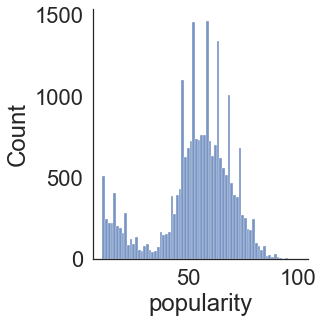

In [17]:
sns.displot(df['popularity'])

#popularity graph is normal


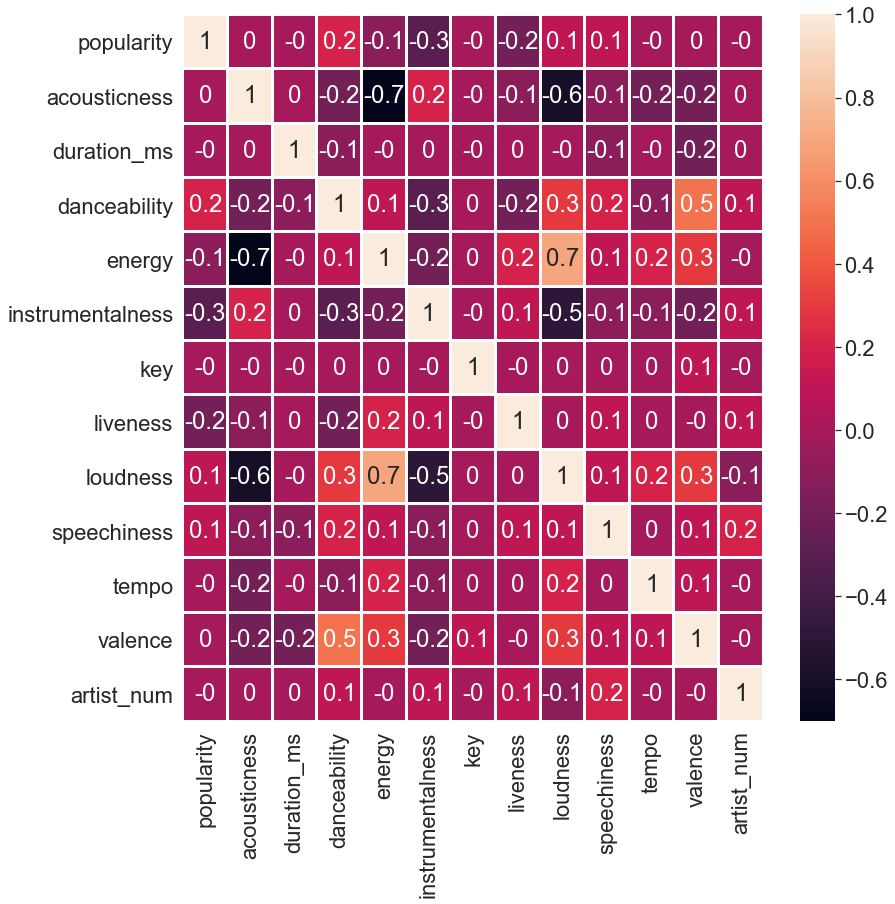

In [18]:
heat_df = df.drop(columns=['artists', 'year', 'explicit', 'mode' ])
plt.figure(figsize = (13,13))
heat_map = sns.heatmap(round(heat_df.corr(), ndigits = 1),
                     annot = True, 
                     vmax=1,
                     linewidths = 2)

plt.show()

This heatmap is one type of visualization of the correclation between all the elements defining "popularity". The color of the square indicates the level of correlation. The "+" or "-" decides whether the correlation is positive or negative. Using this graph, we can directly see what factors are more influencial to the popularity of a song.

In [19]:
df.corr()

,popularity,acousticness,duration_ms,year,explicit,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist_num
popularity,1.000000,0.000675,-0.019709,0.044661,0.242308,0.205961,-0.076223,-0.318712,-0.008318,-0.197580,0.140256,-0.031433,0.070312,-0.026623,0.014833,-0.036581
acousticness,0.000675,1.000000,0.015116,-0.020348,-0.126643,-0.157643,-0.724997,0.202612,-0.021290,-0.070270,-0.602697,0.090840,-0.082680,-0.165936,-0.174678,0.017624
duration_ms,-0.019709,0.015116,1.000000,-0.167517,-0.005038,-0.126408,-0.048232,0.036672,-0.015940,0.013607,-0.045174,-0.008859,-0.067347,-0.028582,-0.183671,0.028238
year,0.044661,-0.020348,-0.167517,1.000000,0.162589,0.079902,-0.041746,0.090010,-0.004831,0.051202,-0.030570,-0.061659,0.090300,0.020858,-0.154635,0.130977
explicit,0.242308,-0.126643,-0.005038,0.162589,1.000000,0.290454,0.035874,-0.170393,-0.000914,0.005016,0.124983,-0.111042,0.454754,-0.009716,-0.019843,0.155267
danceability,0.205961,-0.157643,-0.126408,0.079902,0.290454,1.000000,0.066117,-0.271835,0.026705,-0.155698,0.264560,-0.072617,0.204478,-0.097445,0.464908,0.064735
energy,-0.076223,-0.724997,-0.048232,-0.041746,0.035874,0.066117,1.000000,-0.177327,0.042259,0.163902,0.729366,-0.084083,0.087043,0.212437,0.316947,-0.026618
instrumentalness,-0.318712,0.202612,0.036672,0.090010,-0.170393,-0.271835,-0.177327,1.000000,-0.011709,0.059171,-0.485230,-0.023782,-0.099068,-0.063209,-0.238258,0.070206
key,-0.008318,-0.021290,-0.015940,-0.004831,-0.000914,0.026705,0.042259,-0.011709,1.000000,-0.012154,0.035541,-0.132666,0.019530,0.008422,0.055420,-0.011927
liveness,-0.197580,-0.070270,0.013607,0.051202,0.005016,-0.155698,0.163902,0.059171,-0.012154,1.000000,0.016556,-0.006609,0.120006,0.013515,-0.021162,0.076685


This is another visualization of the correlation of all the elements. It is the same information presented in the above graph, but in the form of numbers. We are able to compare the correlation in higher accuracy because we can trace the decimals, especially when the differences between correlations are all very small.

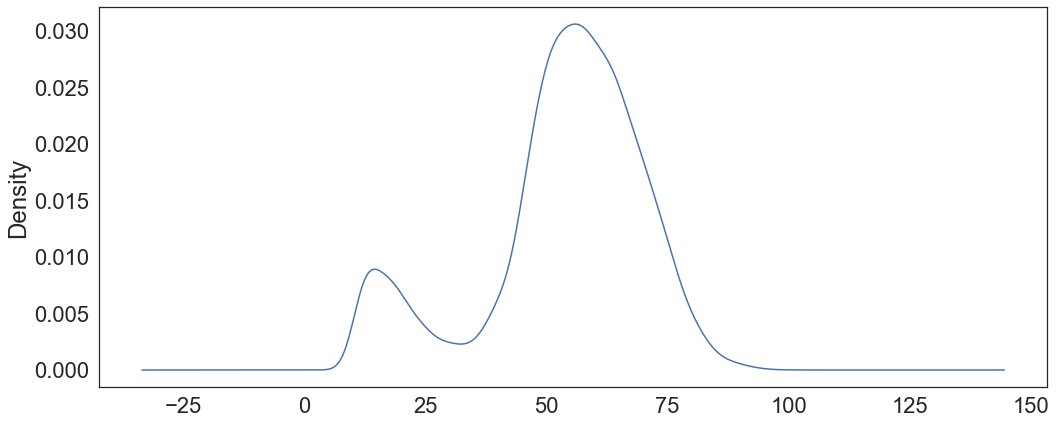

In [20]:
ax = df['popularity'].plot.kde()

From the EDA above, we find out that the correlation of popularity with other varibales are not clear which makes it hard to draw conclusion. Therefore, we plot a distribution of popularity and see if we can further clean the data with only high popularity. 
In this lineplot above, we can see that the majority of songs have the popularity at the range between 40-80. First, We want to look for features of songs that lead to high popularity, so we don't care much about songs with realative low popularity. So we drop the data with popularity below 50. 

In [21]:
df = df[df['popularity']>50]

C:\Users\yifan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='popularity', ylabel='danceability'>

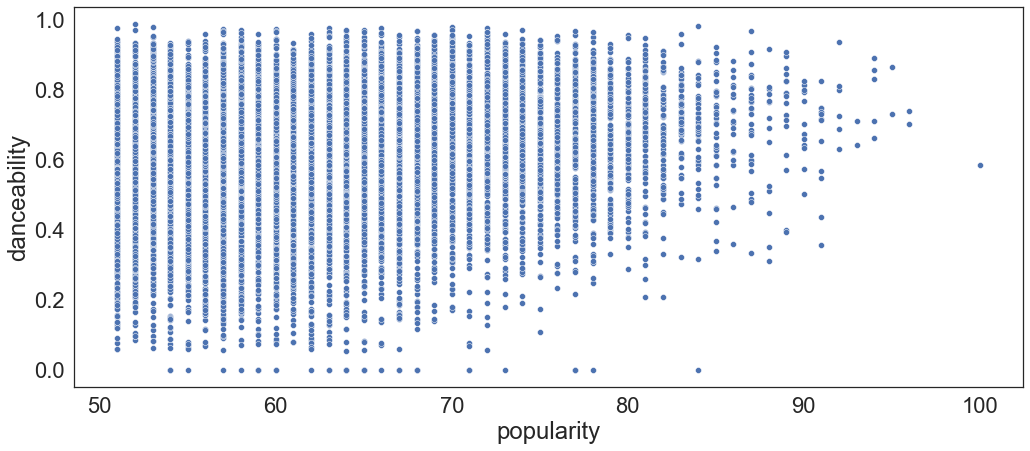

In [22]:
sns.scatterplot(df['popularity'],df['danceability'])

C:\Users\yifan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='popularity', ylabel='liveness'>

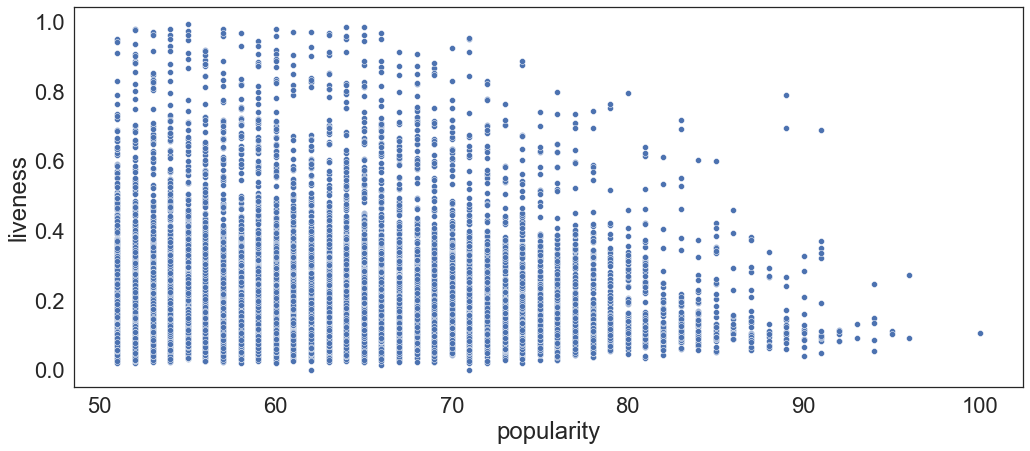

In [23]:
sns.scatterplot(df['popularity'],df['liveness'])

The two graphs above demonstrate that after deleting data with popularity lower than 50, we can discover a rough pattern between popularity and other variables, in contrast to the high density of dots everywhere before cleaning. 

In [24]:
# add a varible that describe the number of artistis of each song
def artist_num(string):
    list = string.split(",")
    return len(list)

df=df.assign(artist_num = df["artists"].apply(artist_num))
multiple_artists_df = df[df["artist_num"]>1]

In [25]:
# pick the variable that we are interested in
df=df[["year","popularity","explicit","danceability","energy",
       "instrumentalness","key","liveness","loudness",
       "artist_num"]]


# Data Analysis & Results

### 1. We are intererested in whether the "key" impacts popularity.

In [26]:
outcome,predictor=patsy.dmatrices("popularity ~ key",df)
mod = sm.OLS(outcome,predictor)
res=mod.fit()
print("The correlation between key and popularity: ",pearsonr(df["key"],df["popularity"])[0])
print(res.summary())


The correlation between key and popularity:  0.0017074838318999151
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.04744
Date:                Wed, 17 Mar 2021   Prob (F-statistic):              0.828
Time:                        10:58:27   Log-Likelihood:                -57434.
No. Observations:               16273   AIC:                         1.149e+05
Df Residuals:                   16271   BIC:                         1.149e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

The linear regression shows that there is no relationship between key and popularity so we abandon this variable
reason: 1. R-coefficient is 0.001707, very small  2. R-squared is small  3 .p-value>0.05  4. beta is small, 0.004

### 2. We are intererested in whether the "explicit" impacts popularity.

In [27]:
outcome,predictor=patsy.dmatrices("popularity ~ explicit",df)
mod = sm.OLS(outcome,predictor)
res=mod.fit()
print("The correlation between explicit and popularity: ",pearsonr(df["explicit"],df["popularity"])[0])
print(res.summary())

The correlation between explicit and popularity:  0.17828988423738962
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     534.2
Date:                Wed, 17 Mar 2021   Prob (F-statistic):          2.57e-116
Time:                        10:58:27   Log-Likelihood:                -57171.
No. Observations:               16273   AIC:                         1.143e+05
Df Residuals:                   16271   BIC:                         1.144e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

We keep explicit column for further analysis. There is some weak relatinship between explicit and popularity

### 3. We are intererested in whether "danceability" impacts popularity.

In [28]:
outcome,predictor=patsy.dmatrices("popularity ~ danceability",df)
mod = sm.OLS(outcome,predictor)
res=mod.fit()
print("The correlation between danceability and popularity: ",pearsonr(df["danceability"],df["popularity"])[0])
print(res.summary())

The correlation between danceability and popularity:  0.18665185286688418
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     587.3
Date:                Wed, 17 Mar 2021   Prob (F-statistic):          1.72e-127
Time:                        10:58:27   Log-Likelihood:                -57145.
No. Observations:               16273   AIC:                         1.143e+05
Df Residuals:                   16271   BIC:                         1.143e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

There is a weak relationship, but we will keep this column

### 4. We are intererested in whether "energy" impacts popularity.

In [29]:

outcome,predictor=patsy.dmatrices("popularity ~ energy",df)
mod = sm.OLS(outcome,predictor)
res=mod.fit()
print("The correlation between energy and popularity: ",pearsonr(df["energy"],df["popularity"])[0])
print(res.summary())


The correlation between energy and popularity:  -0.05187010540039916
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     43.90
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           3.57e-11
Time:                        10:58:27   Log-Likelihood:                -57412.
No. Observations:               16273   AIC:                         1.148e+05
Df Residuals:                   16271   BIC:                         1.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

The relationship between engery and popularity is too weak, so we will not use this energy as a variable.

### 5. We are intererested in whether "liveness" impacts popularity.

In [30]:

outcome,predictor=patsy.dmatrices("popularity ~ liveness",df)
mod = sm.OLS(outcome,predictor)
res=mod.fit()
print("The correlation between liveness and popularity: ",pearsonr(df["liveness"],df["popularity"])[0])
print(res.summary())


The correlation between liveness and popularity:  -0.05249258506338535
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     44.96
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           2.08e-11
Time:                        10:58:27   Log-Likelihood:                -57411.
No. Observations:               16273   AIC:                         1.148e+05
Df Residuals:                   16271   BIC:                         1.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

The relationship between liveness and popularity is too weak, so we will not use this liveness as a variable.

### 6. We are intererested in whether "loudness" impacts popularity.

In [31]:

outcome,predictor=patsy.dmatrices("popularity ~ loudness",df)
mod = sm.OLS(outcome,predictor)
res=mod.fit()
print("The correlation between loudness and popularity: ",pearsonr(df["loudness"],df["popularity"])[0])
print(res.summary())


The correlation between loudness and popularity:  0.06550639272109612
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     70.12
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           6.03e-17
Time:                        10:58:27   Log-Likelihood:                -57399.
No. Observations:               16273   AIC:                         1.148e+05
Df Residuals:                   16271   BIC:                         1.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

The relationship between loudness and popularity is too weak, so we will not use this loudness as a variable.

### 7. We are intererested in whether "instrumentalness" impacts popularity.

In [32]:

outcome,predictor=patsy.dmatrices("popularity ~ instrumentalness",df)
mod = sm.OLS(outcome,predictor)
res=mod.fit()
print("The correlation between instrumentalness and popularity: ",pearsonr(df["instrumentalness"],df["popularity"])[0])
print(res.summary())


The correlation between instrumentalness and popularity:  -0.10950595292142162
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           1.35e-44
Time:                        10:58:28   Log-Likelihood:                -57336.
No. Observations:               16273   AIC:                         1.147e+05
Df Residuals:                   16271   BIC:                         1.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

There is a weak relationship between instrumentalness and popularity, but we will use instrumentalness as a variable, since it is relatively strong compared with other variables.

### Conclusion: 
#### We find that the element -- danceability, explicit, liveness, loudness and instrumentalness -- have some impacts on popularity. Among them, danceability, explicit, and instrumentalness have stronger impacts than livenss and loudness. As a result, we will dig deeper into these three varibales. 

#### First, we need to make sure that danceability, explicit, and instrumentalness are not confounders. 
#### Explicit is a binary value, so we will only look at relationship between dancebility and instrumentalness

<AxesSubplot:xlabel='danceability', ylabel='instrumentalness'>

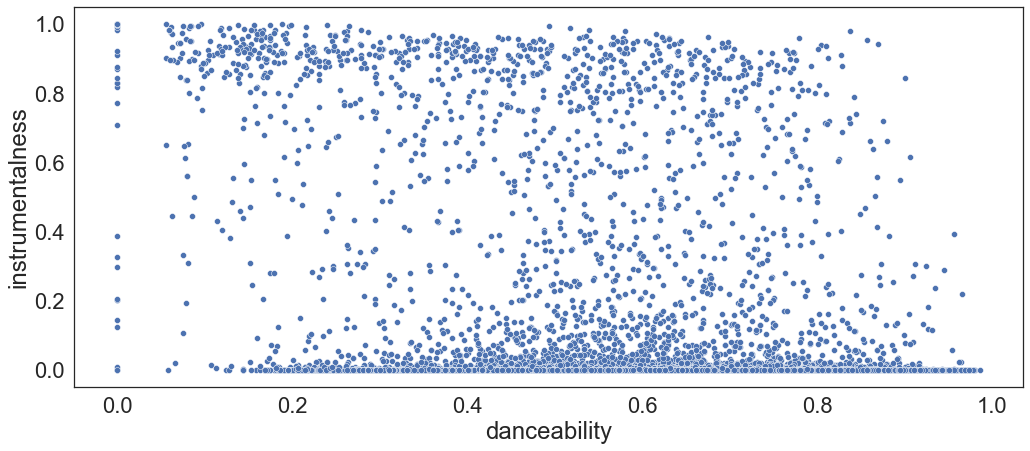

In [33]:

sns.scatterplot(x="danceability",y="instrumentalness",data=df)


the graph shows that there is not an obvious relationship between danceability and instrumentalness.

#### Then we will analyze the impacts of danceability, explicit, and instrumentalness on tracks before and after 2010 to see the overall trend

In [34]:

# first danceability on popularity before 2010
outcome,predictor=patsy.dmatrices("popularity ~ danceability",df[df["year"]<2010])
mod = sm.OLS(outcome,predictor)
res=mod.fit()
print("The correlation between danceability and popularity before 2010: ",pearsonr(df[df["year"]<2010]["danceability"],df[df["year"]<2010]["popularity"])[0])
print(res.summary())


The correlation between danceability and popularity before 2010:  0.08257696795621039
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     40.30
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           2.35e-10
Time:                        10:58:28   Log-Likelihood:                -19121.
No. Observations:                5871   AIC:                         3.825e+04
Df Residuals:                    5869   BIC:                         3.826e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

#### Before, for every 1 unit increase in danceability, we expect to see a 3.0197 unit increase in popularity

In [35]:
# then danceability on popularity after 2010
outcome,predictor=patsy.dmatrices("popularity ~ danceability",df[df["year"]>=2010])
mod = sm.OLS(outcome,predictor)
res=mod.fit()
print("The correlation between key and popularity after 2010: ",pearsonr(df[df["year"]>=2010]["danceability"],df[df["year"]>=2010]["popularity"])[0])
print(res.summary())


The correlation between key and popularity after 2010:  0.21132214239474245
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     486.1
Date:                Wed, 17 Mar 2021   Prob (F-statistic):          2.49e-105
Time:                        10:58:28   Log-Likelihood:                -36571.
No. Observations:               10402   AIC:                         7.315e+04
Df Residuals:                   10400   BIC:                         7.316e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

#### After 2010, for every 1 unit increase in danceability, we expect to see a 10.7282 unit increase in popularity

#### Compare

In [36]:
# compare popular tracks's average danceability socres before and after 2010

print("average danceability before 2010: ",df[(df["year"]<2010)& (df["popularity"]>50)]["danceability"].mean())
print("average danceability after 2010: ",df[(df["year"]>=2010)& (df["popularity"]>50)]["danceability"].mean())
t_val,p_val = ttest_ind(df[(df["year"]<2010)& (df["popularity"]>50)]["danceability"],df[(df["year"]>=2010)& (df["popularity"]>50)]["danceability"])
print("p-value: ",p_val)


average danceability before 2010:  0.587316726281724
average danceability after 2010:  0.6153388290713319
p-value:  1.1289436065860171e-24


#### Since p value is smaller than 0.05, there is a significant difference between the 2000-2010 popular tracks' danceability scores and 2011-2020 popular tracks' danceability scores

In [37]:
# first instrumentalness on popularity before 2010
outcome,predictor=patsy.dmatrices("popularity ~ instrumentalness",df[df["year"]<2010])
mod = sm.OLS(outcome,predictor)
res=mod.fit()
print("The correlation between instrumentalness and popularity before 2010: ",pearsonr(df[df["year"]<2010]["instrumentalness"],df[df["year"]<2010]["popularity"])[0])
print(res.summary())


The correlation between instrumentalness and popularity before 2010:  -0.1091411764402109
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     70.75
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           5.03e-17
Time:                        10:58:28   Log-Likelihood:                -19106.
No. Observations:                5871   AIC:                         3.822e+04
Df Residuals:                    5869   BIC:                         3.823e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

#### Before 2010, for every 1 unit increase in instrumentalness, we expect to see a -3.3011 unit increase in popularity

In [38]:
# then instrumentalness on popularity after 2010
outcome,predictor=patsy.dmatrices("popularity ~ instrumentalness",df[df["year"]>=2010])
mod = sm.OLS(outcome,predictor)
res=mod.fit()
print("The correlation between key and popularity after 2010: ",pearsonr(df[df["year"]>=2010]["instrumentalness"],df[df["year"]>=2010]["popularity"])[0])
print(res.summary())

The correlation between key and popularity after 2010:  -0.10526590836243105
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     116.5
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           5.05e-27
Time:                        10:58:28   Log-Likelihood:                -36751.
No. Observations:               10402   AIC:                         7.351e+04
Df Residuals:                   10400   BIC:                         7.352e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

#### After 2010, for every 1 unit increase in instrumentalness, we expect to see a -4.6639 unit increase in popularity

In [39]:
# compare popular tracks's average instrumentalness socres before and after 2010

print("average instrumentalness before 2010: ",df[(df["year"]<2010)& (df["popularity"]>50)]["instrumentalness"].mean())
print("average instrumentalness after 2010: ",df[(df["year"]>=2010)& (df["popularity"]>50)]["instrumentalness"].mean())
t_val,p_val = ttest_ind(df[(df["year"]<2010)& (df["popularity"]>50)]["instrumentalness"],df[(df["year"]>=2010)& (df["popularity"]>50)]["instrumentalness"])
print("p-value: ",p_val)

average instrumentalness before 2010:  0.06517422245954708
average instrumentalness after 2010:  0.05176136180349934
p-value:  2.68061992480782e-05


#### Since p value is smaller than 0.05, there is a significant difference between the 2000-2010 popular tracks' instrumentalness scores and 2011-2020 popular tracks' instrumentalness scores

In [40]:
# first explicit on popularity before 2010
outcome,predictor=patsy.dmatrices("popularity ~ explicit",df[df["year"]<2010])
mod = sm.OLS(outcome,predictor)
res=mod.fit()
print("The correlation between explicit and popularity before 2010: ",pearsonr(df[df["year"]<2010]["explicit"],df[df["year"]<2010]["popularity"])[0])
print(res.summary())


The correlation between explicit and popularity before 2010:  0.027229609000599425
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.355
Date:                Wed, 17 Mar 2021   Prob (F-statistic):             0.0369
Time:                        10:58:28   Log-Likelihood:                -19139.
No. Observations:                5871   AIC:                         3.828e+04
Df Residuals:                    5869   BIC:                         3.830e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

#### Before 2010, if a track is explicit, it will contribute 0.4783 unit to its popularity

In [41]:
# then explicit on popularity after 2010
outcome,predictor=patsy.dmatrices("popularity ~ explicit",df[df["year"]>=2010])
mod = sm.OLS(outcome,predictor)
res=mod.fit()
print("The correlation between explicit and popularity after 2010: ",pearsonr(df[df["year"]>=2010]["explicit"],df[df["year"]>=2010]["popularity"])[0])
print(res.summary())

The correlation between explicit and popularity after 2010:  0.1422170642853561
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     214.7
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           3.93e-48
Time:                        10:58:28   Log-Likelihood:                -36702.
No. Observations:               10402   AIC:                         7.341e+04
Df Residuals:                   10400   BIC:                         7.342e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

#### After 2010, if a track is explicit, it will contribute 2.5050 unit to its popularity

In [42]:
# compare popular tracks's average explicit socres before and after 2010

print("average percentage of explicit popular tracks before 2010: ",df[(df["year"]<2010)& (df["popularity"]>70)]["explicit"].mean())
print("average percentage of explicit popular tracks after 2010: ",df[(df["year"]>=2010)& (df["popularity"]>70)]["explicit"].mean())
t_val,p_val = ttest_ind(df[(df["year"]<2010)& (df["popularity"]>70)]["explicit"],df[(df["year"]>=2010)& (df["popularity"]>70)]["explicit"])
print("p-value: ",p_val)


average percentage of explicit popular tracks before 2010:  0.19760479041916168
average percentage of explicit popular tracks after 2010:  0.420584968530174
p-value:  2.842011657616983e-15


#### Since p value is smaller than 0.05, there is a significant difference between the 2000-2010 popular tracks' explicit scores and 2011-2020 popular tracks' explicit scores.

#### One conclusion: for some reasons, danceablity, explicit, and instrumentalness generally have stronger effects on tracks after 2010 than tracks before 2010.



# Ethics & Privacy

Due to potential ethics and privacy concerns, first we confirm that our datasets were all downloaded from public data collection sites such as Kaggle. The datasets were free to download and use with proper and complete citation in researches. 

However, there still exists concerns. Although our main dataset was collected by Spotify Web API, we noticed that there are a lot of missing information in the dataset from songs that are older or foreign (there are some songs have the information written in foreign lanaguges). We did not know how Spotify got the consent or permission from the original song creators, especially when the creators could be possibly dead or unaware of their songs are being published in platforms they didn't know and even used for researches. In this case, we decided to drop all the rows that are empty, and those who are too old. This helped us reduce our data size and also minimize the concern.


# Conclusion & Discussion

In the original dataset, there are many factors that may contribute to answer our question: What factor(s) play the most important role in determining the popularity of a song on Spotify? The size of the dataset is also very large and contains some data that are not very useful. To set the size of the dataset to the most ideal, we dropped some null rows, reduce the year span, and prioritize some factors that we think are more important. 

However, we were still pretty lost on which factors we should mostly focus on. Therefore, we did some exploration and tests first. We created a heatmap, and observing which few factors are more impactful to the popularity of the songs. This visualization helped us narrow down the size of our focus so we move on to our final analysis.

We chose 7 out of all elements to analyze and to see whether they have a strong correlation with popularity. After analysis on each one of them, we, further more, narrowed it down to 3 elements: danceability, explicit, and instrumentalness, which have the strongest impact on popularity among all the factors.However, there is one concern with the result. Only a very small percent of variation in popularity is explained by these three factors. As we saw that R-suqared is small.

Just to see what else we can get from the data, we used t-test to observe a trend that popular tracks after 2010 have higher danceability scores and lower instrumentalness socres than tracks before 2010, and popular tracks after 2010 are more likely to have explicit languages than popular tracks before 2010.We also did linear regression analysis again on the tracks before and after 2010. We found out that danceability, explicit, and instrumentalness all have greater impacts on tracks after 2010 than tracks before 2010.

To conclude, we believe that the answer to our question is that: on Spotify, the more danceable, explicit (having strong lanaguges), and less amount of instruments a song has, the more popular the song will be. 


# Team Contribution


All team members have contributed at their best, attending weekly meeting on time, discussing project details, encouraging each other...
* Ling Jin 
* Teng Wong
* Zhiyuan Chen
* Meishi Li
* Yifan Lu
